In [15]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import glob
import os
from PIL import ImageFilter, Image 
import math

In [16]:
%%time
def gauss(x, A, mu, sigma, off):
    return A * np.exp(-(x-mu)**2 / (2 * sigma**2)) + off

CPU times: total: 0 ns
Wall time: 0 ns


In [17]:
%%time
ppmm = 1/0.0069  # pixels per mm to convert position to mm
#ppmm = 1


144.92753623188406
CPU times: total: 0 ns
Wall time: 0 ns


In [18]:
#I = io.imread('D:/STUDY/Thesis & Internship/pybeamprofiler/data/img-05102023194812-19819.png')
# in the original cod this should be a capture from the vid that will be shown to the user
#imsz = I.shape
#x_rows = np.arange(imsz[1])
#x_col = np.arange(imsz[0])

In [19]:
%%time
II=Image.open('D:/STUDY/Thesis & Internship/pybeamprofiler/data/cam1-05312023161329-46.png')
II=II.resize([54,72])
II=II.resize([540,720])

CPU times: total: 0 ns
Wall time: 5.51 ms


In [20]:
%%time
I=np.asarray(II)
imsz = I.shape
x_rows = np.arange(imsz[1])
x_col = np.arange(imsz[0])
I=I/np.amax(I)
yx_coords = np.column_stack(np.where((I >= 0.6 )&(I<=0.606)))




CPU times: total: 0 ns
Wall time: 4.04 ms


In [21]:
%%time
Y_max=((np.amax(yx_coords[:,0])+np.amin(yx_coords[:,0]))/2)

X_max=((np.amax(yx_coords[:,1])+np.amin(yx_coords[:,1]))/2)


CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
%%time
KK=(yx_coords[:,1]-X_max)**2+(yx_coords[:,0]-Y_max)**2
P_axis=np.where(KK==np.amax(KK))
P_axis=yx_coords[P_axis[0]]
m=(P_axis[0][0]-Y_max)/(P_axis[0][1]-X_max)
X=np.linspace(200, 300, num=200)
Y=(m)*(X-X_max)+Y_max
print(math.atan(m)*180/math.pi)

-81.0760115563686
CPU times: total: 0 ns
Wall time: 1.99 ms


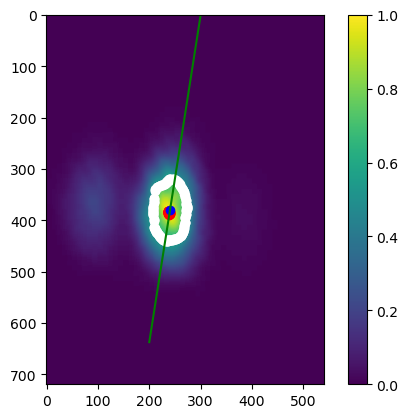

CPU times: total: 250 ms
Wall time: 402 ms


In [23]:
%%time

plt.figure()
plt.imshow(I)
plt.colorbar()
plt.scatter(yx_coords[:,1],yx_coords[:,0], c='w')
plt.scatter(MAX_POS[:,1],MAX_POS[:,0], c='r')
plt.scatter(X_max,Y_max, c='b')
plt.plot(X,Y, c='g')
plt.show()

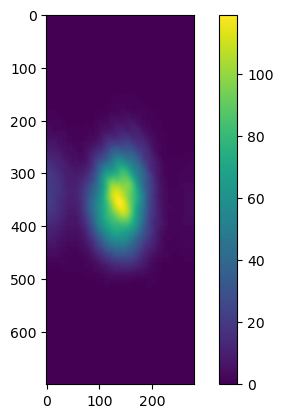

In [27]:
III=II.crop(((round(X_max)-140),(round(Y_max)-350),(round(X_max)+140),(round(Y_max)+350)))

plt.figure()
plt.imshow(III)
plt.colorbar()
plt.show()

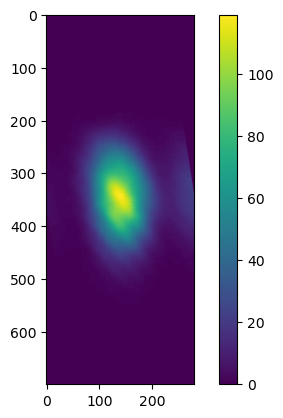

In [28]:
IIII=III.rotate((math.atan(m)*180/math.pi)-90)
plt.figure()
plt.imshow(IIII)
plt.colorbar()
plt.show()

In [29]:

sum_rows = np.mean(IIII, axis=0)   #get array with the sums of the rows
sum_col = np.mean(IIII, axis=1) #get array with the sums of the columns

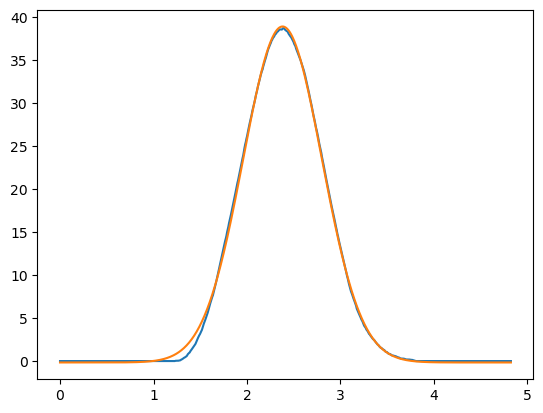

In [30]:
x_col=np.linspace(0, 699, num=700)/ppmm
mu0 = np.argmax(sum_col)
ampl0 = np.max(sum_col)
p0 = ampl0, mu0

popt2,pcov2 = curve_fit(gauss, x_col,  sum_col)

pos = popt2[1]
std = popt2[2]
plt.figure()
plt.plot(x_col,sum_col)
plt.plot(x_col,gauss(x_col, *popt2))

In [31]:
len(sum_col)

700

In [7]:
# import the opencv library
import cv2
  
  
# define a video capture object
vid = cv2.VideoCapture(0)
  
while(True):
      
    # Capture the video frame
    # by frame
    ret, frame = vid.read()
  
    # Display the resulting frame
    cv2.imshow('frame', frame)
      
    # the 'q' button is set as the
    # quitting button you may use any
    # desired button of your choice
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    if cv2.waitKey(1) & 0xFF == ord('r'):
        G=frame
        vid.set(cv2.CAP_PROP_EXPOSURE, -1) 
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()

In [ ]:
Num_of_frames=6
X_Max_Pos=np.zeros(Num_of_frames)   #array to follow the X-position of the beam center
Y_Max_Pos=np.zeros(Num_of_frames)   #array to follow the Y-position of the beam center
for x in range(Num_of_frames):
    X_Max_Pos[x]=X_max
    Y_Max_Pos[x]=Y_max